In [1]:
#!pip install librosa

In [2]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct

sample_rate, signal = scipy.io.wavfile.read('1.wav')  # File assumed to be in the same directory
signal = signal[0:int(3.5 * sample_rate)]  # Keep the first 3.5 seconds

In [3]:
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

In [4]:
 frame_size = 0.025
frame_stride = 0.01
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [5]:
frames *= numpy.hamming(frame_length)

In [6]:
NFFT = 512
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

In [7]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [8]:
num_ceps = 12
mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13

In [9]:
cep_lifter=12
(nframes, ncoeff) = mfcc.shape
n = numpy.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
mfcc *= lift  #*

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

In [11]:
frequency_sampling, audio_signal = wavfile.read("1.wav")

In [12]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')


Signal shape: (471040, 2)
Signal Datatype: int16
Signal duration: 9.81 seconds


In [48]:
audio_signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(signal), 1) / float(frequency_sampling)

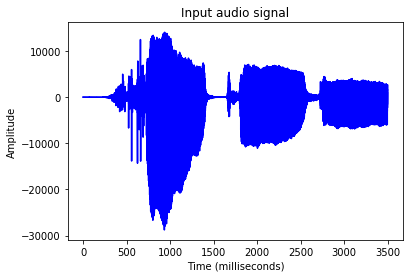

In [46]:
plt.plot(time_axis, signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [24]:
#using google api

#!pip install Pyaudio
# !pip install SpeechRecognition
#!pip install python_speech_features
# !pip install google-api-python-client

In [51]:
# audio_signal = audio_signal[:15000]
# features_mfcc = mfcc(audio_signal, frequency_sampling)
# print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
# print('Length of each feature =', features_mfcc.shape[1])
# features_mfcc = features_mfcc.T
# plt.matshow(features_mfcc)
# plt.title('MFCC')




In [50]:
# filterbank_features = logfbank(audio_signal, frequency_sampling)
# print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
# print('Length of each feature =', filterbank_features.shape[1])
# filterbank_features = filterbank_features.T
# plt.matshow(filterbank_features)
# plt.title('Filter bank')
# plt.show()

[[-3.60436534e+01  0.00000000e+00 -3.20763172e-14 ... -3.27769755e-13
   0.00000000e+00  3.59484803e-13]
 [-3.60436534e+01  0.00000000e+00 -3.20763172e-14 ... -3.27769755e-13
   0.00000000e+00  3.59484803e-13]
 [-3.60436534e+01  0.00000000e+00 -3.20763172e-14 ... -3.27769755e-13
   0.00000000e+00  3.59484803e-13]
 ...
 [ 8.50029251e+00 -1.37297256e+01 -1.42287626e+01 ... -5.56875681e+00
   1.09557341e+01  7.82173679e+00]
 [ 1.08831094e+01 -1.44842880e+01 -2.40552345e+01 ...  1.45423676e+01
   1.98354621e+00 -6.50152810e+00]
 [ 1.07497319e+01 -2.10648508e+01 -3.07798141e+01 ...  1.93952169e+01
   6.90544800e+00 -5.80836847e+00]]


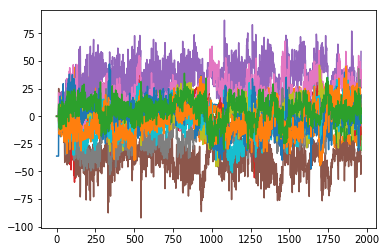

In [32]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

(rate,sig) = wav.read("1.wav")
mfcc_feat = mfcc(sig,rate)

print(mfcc_feat)
plt.plot(mfcc_feat)
plt.show()

In [67]:
import speech_recognition as sr
# get audio from the microphone                                                                       
r = sr.Recognizer()                                                                                   
with sr.Microphone() as source:                                                                       
    print("Speak only alphabet:")   
    audio = r.listen(source)   

try:
    print("You said " + r.recognize_google(audio,language='hi-IN'))
except sr.UnknownValueError:
    print("Could not understand audio")
except sr.RequestError as e:
    print("Could not request results; {0}".format(e))

Speak only alphabet:
You said क ख ग
